<h1>Chicago Taxi Trip Network Assignment</h1>
<li>The file, Chicago_taxi_trips_JunJul2015.xlsx, contains citibike trip data from June to July 2015 (a reasonable sized file!)
<li>The data:<br>
"trip_start_timestamp", "trip_end_timestamp",	"trip_seconds",	"trip_miles",	"pickup_community_area", "dropoff_community_area",	"fare",	"tips",	"tolls",	"extras",	"trip_total",	"payment_type",	"pickup_latitude",	"pickup_longitude",	"dropoff_latitude", and	"dropoff_longitude"
<li>Each record in the data is a trip 
<li>The data is described at <a>https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=chicago_taxi_trips&page=dataset</a>

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

<h1>STEP 1: Read the data into a dataframe</h1>

In [3]:
file_path = 'Chicago_taxi_trips_JunJul2015.xlsx'
chicago_taxi_data = pd.read_excel(file_path)

 
chicago_taxi_data.head()

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,2015-06-03 23:30:00,2015-06-03 23:30:00,60.0,0.00,14,14,3.45,0.0,0.0,0.0,3.45,Cash,41.968069,-87.721559,41.968069,-87.721559
1,2015-06-06 01:15:00,2015-06-06 01:30:00,540.0,2.80,14,14,8.85,0.0,0.0,0.0,8.85,Cash,41.968069,-87.721559,41.968069,-87.721559
2,2015-05-24 23:45:00,2015-05-24 23:45:00,180.0,0.50,14,14,4.65,0.0,0.0,0.0,4.65,Cash,41.968069,-87.721559,41.968069,-87.721559
3,2015-06-10 13:45:00,2015-06-10 14:00:00,300.0,0.62,14,14,4.85,0.0,0.0,0.0,4.85,Cash,41.968069,-87.721559,41.968069,-87.721559
4,2015-06-02 21:45:00,2015-06-02 22:00:00,240.0,1.00,14,14,5.25,0.0,0.0,0.0,5.25,Cash,41.968069,-87.721559,41.968069,-87.721559


<h1>STEP 2: Basic cleaning</h1>
<li>Remove data that have any nans in any row</li>
<li>Convert pickup_community_area and dropoff_community_area to str</li>
<li>
    Rename following columns:
    <ul>
        <li>"pickup_community_area" to "pickup_station"</li>
        <li>"dropoff_community_area" to "dropoff_station"</li>
        <li>"trip_seconds" to "trip_duration"</li>
    </ul>
</li>

In [4]:
import pandas as pd
 
chicago_taxi_data.dropna(inplace=True)

 
chicago_taxi_data['pickup_community_area'] = chicago_taxi_data['pickup_community_area'].astype(str)
chicago_taxi_data['dropoff_community_area'] = chicago_taxi_data['dropoff_community_area'].astype(str)
 
chicago_taxi_data.rename(columns={
    'pickup_community_area': 'pickup_station',
    'dropoff_community_area': 'dropoff_station',
    'trip_seconds': 'trip_duration'
}, inplace=True)
 

<h1>STEP 3: Get the Community Area Name</h1> 
<li> Read the Chicago Community Area data
<li> Get and create two columns, pickup_station_name and dropoff_station_name, you'll need to join these two dataframes by matching the pickup/dropoff_station_id to the Community Area Code
<li> You may need to convert Community_Area_Code to str type
<li> Be careful of columns duplication

In [5]:
import pandas as pd

 
community_area_file_path = 'Chicago_community_area.xlsx'
community_area_data = pd.read_excel(community_area_file_path)
 
community_area_data['Community_Area_Code'] = community_area_data['Community_Area_Code'].astype(str)

 
community_area_data.rename(columns={'Community_Area_Code': 'station_id', 'Community_Area_Name': 'station_name'}, inplace=True)
 
chicago_taxi_data = chicago_taxi_data.merge(
    community_area_data[['station_id', 'station_name']],
    left_on='pickup_station',
    right_on='station_id',
    how='left'
)
chicago_taxi_data.rename(columns={'station_name': 'pickup_station_name'}, inplace=True)
 
chicago_taxi_data = chicago_taxi_data.merge(
    community_area_data[['station_id', 'station_name']],
    left_on='dropoff_station',
    right_on='station_id',
    how='left'
)
chicago_taxi_data.rename(columns={'station_name': 'dropoff_station_name'}, inplace=True)
 
chicago_taxi_data.drop(columns=['station_id_x', 'station_id_y'], inplace=True, errors='ignore')
 
chicago_taxi_data.to_csv('path_to_save_modified_data.csv', index=False)
print(chicago_taxi_data.head())


  trip_start_timestamp  trip_end_timestamp  trip_duration  trip_miles  \
0  2015-06-03 23:30:00 2015-06-03 23:30:00           60.0        0.00   
1  2015-06-06 01:15:00 2015-06-06 01:30:00          540.0        2.80   
2  2015-05-24 23:45:00 2015-05-24 23:45:00          180.0        0.50   
3  2015-06-10 13:45:00 2015-06-10 14:00:00          300.0        0.62   
4  2015-06-02 21:45:00 2015-06-02 22:00:00          240.0        1.00   

  pickup_station dropoff_station  fare  tips  tolls  extras  trip_total  \
0             14              14  3.45   0.0    0.0     0.0        3.45   
1             14              14  8.85   0.0    0.0     0.0        8.85   
2             14              14  4.65   0.0    0.0     0.0        4.65   
3             14              14  4.85   0.0    0.0     0.0        4.85   
4             14              14  5.25   0.0    0.0     0.0        5.25   

  payment_type  pickup_latitude  pickup_longitude  dropoff_latitude  \
0         Cash        41.968069        

<h1>STEP 4: Write a function that returns a graph given a taxitrip data frame</h1> 
<li>Your function should return two things:
<ol>
<li>a graph
<li>a dictionary with station ids as the key and station name as the value
</ol>
<li>The graph should contain 
<ol>
<li>nodes (station ids)
<li>edges (station id, station id)
<li>edge data 
<ol>
<li>count: number of trips on the edge
<li>time: average duration - pickup to dropoff - on that edge
</ol>
</ol>
<li><b>Note:</b> the edge (x1,y1) is the same as (y1,x1) even though the start station ids and end station ids are flipped in the dataframe. You may need a helper function or add this logic into your main function

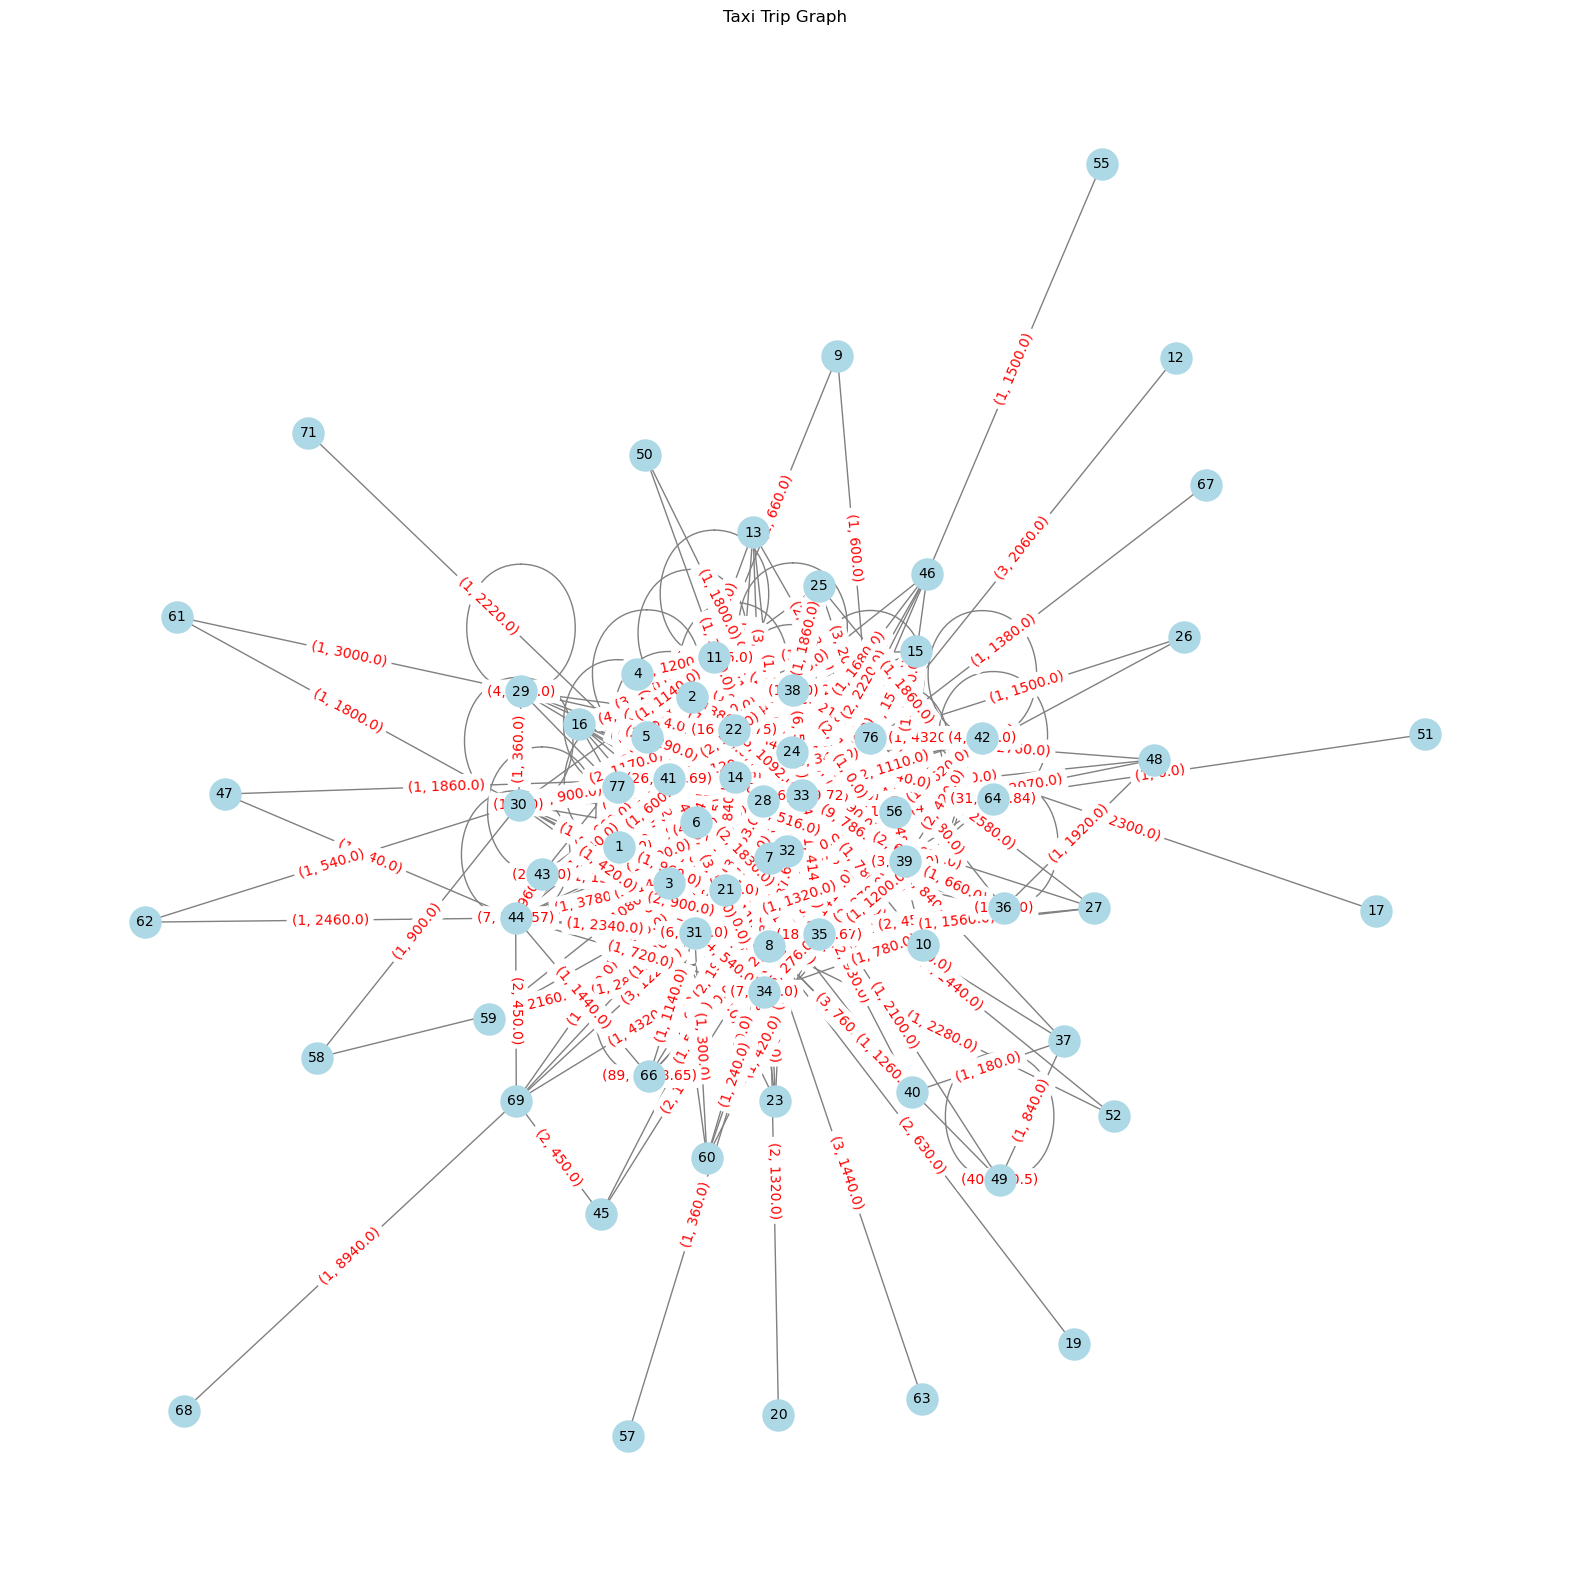

In [6]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

def get_taxitrip_graph(df):
 
    G = nx.Graph()
 
    def sorted_edge(node1, node2):
        return tuple(sorted([node1, node2]))
 
    for index, row in df.iterrows():
 
        edge = sorted_edge(row['pickup_station'], row['dropoff_station'])
        trip_duration = row['trip_duration']
 
        if edge not in G.edges():
            G.add_edge(*edge, count=1, time=trip_duration)
        else:
            G[edge[0]][edge[1]]['count'] += 1
            G[edge[0]][edge[1]]['time'] = (G[edge[0]][edge[1]]['time'] * (G[edge[0]][edge[1]]['count'] - 1) + trip_duration) / G[edge[0]][edge[1]]['count']
 
    station_dict = pd.Series(df['pickup_station_name'].values, index=df['pickup_station']).to_dict()

    return G, station_dict
 
df = pd.read_csv('path_to_save_modified_data.csv')
graph, station_id_name_dict = get_taxitrip_graph(df)

G, station_id_name_dict = get_taxitrip_graph(df)
plt.figure(figsize=(20, 20))

 
pos = nx.spring_layout(G)  # 
 
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
 
nx.draw_networkx_edges(G, pos, edge_color='gray')
 
nx.draw_networkx_labels(G, pos, font_size=10)
 
edge_labels = {(u, v): (d['count'], round(d['time'], 2)) for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.title("Taxi Trip Graph")
plt.axis('off')  
plt.show()


In [7]:
 
G, nodes = get_taxitrip_graph(df)
 
 

<h1>STEP 5: Create the following graphs using the function above</h1>
<li>G: A graph of all the data in the dataframe
<li>cash_G: A graph containing only data with Cash payment type
<li>credit_G: A graph containing only data with Credit Card payment type
<li>Note: for cash_G and credit_G you will need to extract data from the dataframe based on <strong>payment_type</strong> and we do not consider other types here

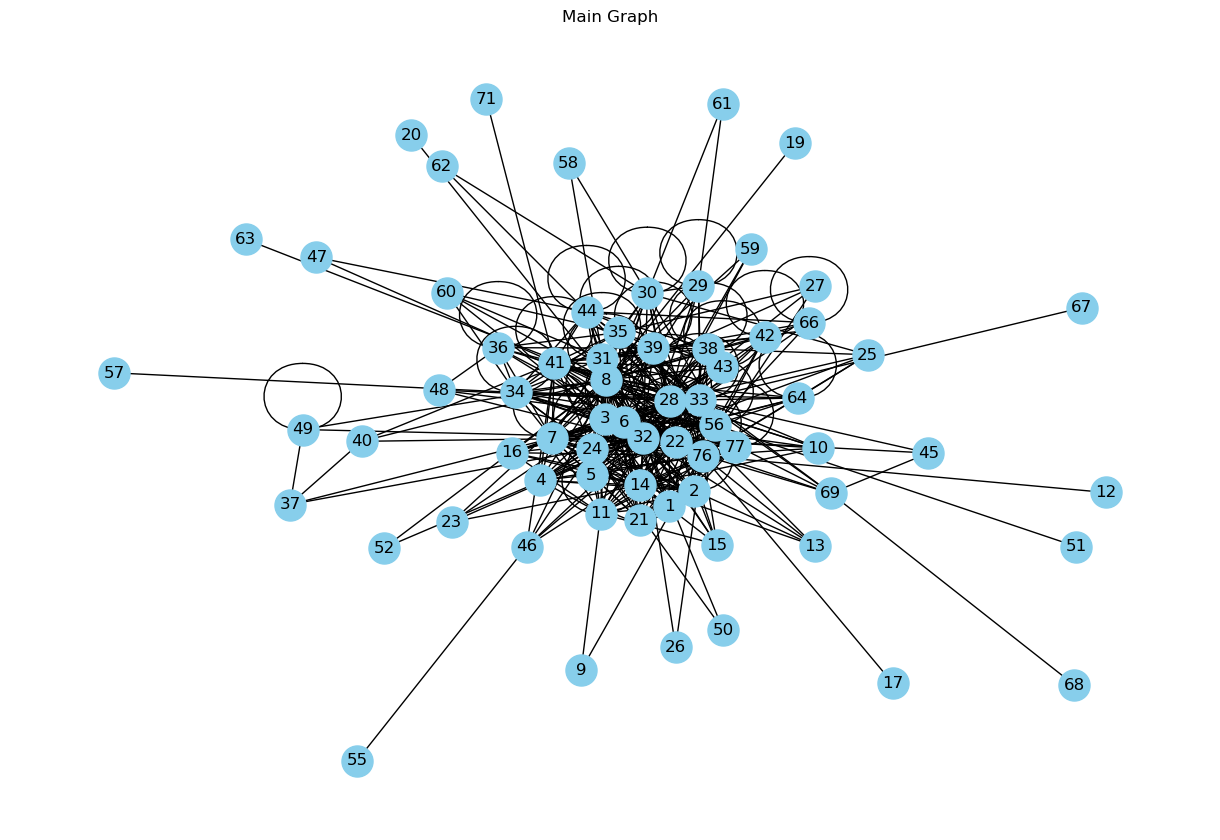

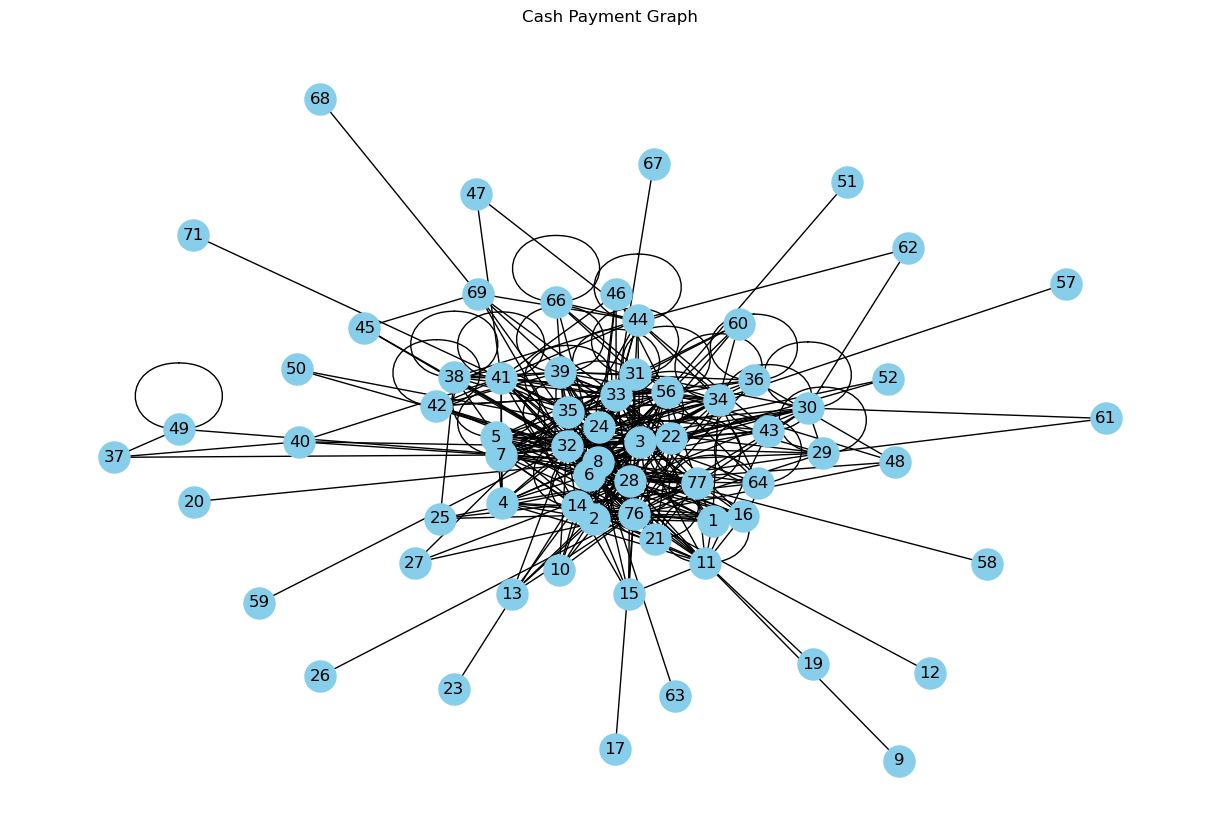

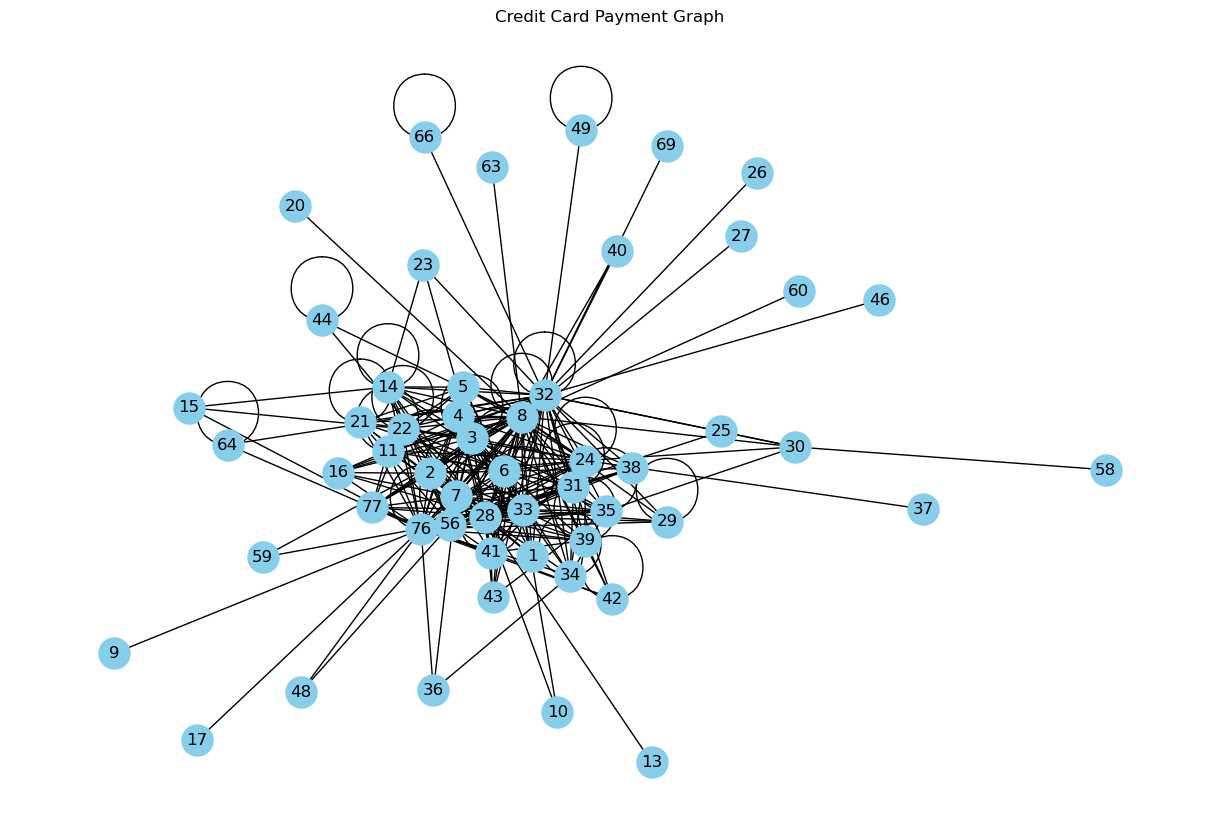

In [8]:
import matplotlib.pyplot as plt
import networkx as nx
 
G, station_id_name_dict = get_taxitrip_graph(df)
 
cash_df = df[df['payment_type'] == 'Cash']
cash_G, _ = get_taxitrip_graph(cash_df)
 
credit_df = df[df['payment_type'] == 'Credit Card']
credit_G, _ = get_taxitrip_graph(credit_df)
 
def draw_graph(G, title):
    plt.figure(figsize=(12, 8))
    nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, node_size=500)
    plt.title(title)
    plt.show()
 
draw_graph(G, "Main Graph")
draw_graph(cash_G, "Cash Payment Graph")
draw_graph(credit_G, "Credit Card Payment Graph")


<h1>STEP 6: Answer the following questions for each of the graphs</h1>
<ol>Now we take a deep dive into the taxi trip network system. Please answer the following questions for df, cash_df and credit_df:
<li>Which stations (name) are the best and worst connected (max degree)?
<li>Travel between which pair of stations is the longest in terms of average duration between taxi pickups and dropoffs. Report both the two stations as well as the time in minutes (float). <strong>Note that you need to filter out the invalid edges with 0 average duration</strong>.
<li>Which edges are associated with the most and least number of trips?
<li>Which station is "neareast" to all other stations (in terms of distance = time)?
<li>Which station is the most important connector or traffic bottleneck (in terms of trip count)?

**Which stations (name) are the best connected (max degree)?**

In [9]:
# Assuming station_id_name_dict maps station IDs to their names

# For the main graph G
max_degree_node_G = max(G.degree(), key=lambda x: x[1])[0]
best_connected_station_G = station_id_name_dict.get(max_degree_node_G, 'Unknown')

print("Best connected station in G:", best_connected_station_G)

# For the cash payment graph cash_G
max_degree_node_cash_G = max(cash_G.degree(), key=lambda x: x[1])[0]
best_connected_station_cash_G = station_id_name_dict.get(max_degree_node_cash_G, 'Unknown')

print("Best connected station in cash_G:", best_connected_station_cash_G)

# For the credit card payment graph credit_G
max_degree_node_credit_G = max(credit_G.degree(), key=lambda x: x[1])[0]
best_connected_station_credit_G = station_id_name_dict.get(max_degree_node_credit_G, 'Unknown')

print("Best connected station in credit_G:", best_connected_station_credit_G)


Best connected station in G: Near North Side
Best connected station in cash_G: Near North Side
Best connected station in credit_G: The Loop


**Which stations (name) are the worst connected (min degree)? (show all stations)**

In [19]:
# Assuming station_id_name_dict maps station IDs to their names

# For the main graph G
min_degree_G = min(dict(G.degree()).values())
worst_connected_stations_G = [station_id_name_dict.get(node, 'Unknown') for node, degree in G.degree() if degree == min_degree_G]
print("Worst connected stations in G:", worst_connected_stations_G)

# For the cash payment graph cash_G
min_degree_cash_G = min(dict(cash_G.degree()).values())
worst_connected_stations_cash_G = [station_id_name_dict.get(node, 'Unknown') for node, degree in cash_G.degree() if degree == min_degree_cash_G]
print("Worst connected stations in cash_G:", worst_connected_stations_cash_G)

# For the credit card payment graph credit_G
min_degree_credit_G = min(dict(credit_G.degree()).values())
worst_connected_stations_credit_G = [station_id_name_dict.get(node, 'Unknown') for node, degree in credit_G.degree() if degree == min_degree_credit_G]
print("Worst connected stations in credit_G:", worst_connected_stations_credit_G)


Worst connected stations in G: ['Auburn Gresham', 'Hermosa', 'Belmont Cragin', 'Unknown', 'Forest Glen', 'Dunning', 'Unknown', 'Unknown', 'Englewood', 'West Englewood', 'Archer Heights']
Worst connected stations in cash_G: ['Auburn Gresham', 'Brighton Park', 'Humboldt Park', 'Hermosa', 'Belmont Cragin', 'Unknown', 'Edison Park', 'West Garfield Park', 'Forest Glen', 'Dunning', 'Unknown', 'Englewood', 'West Englewood', 'McKinley Park', 'Archer Heights']
Worst connected stations in credit_G: ['South Chicago', 'Bridgeport', 'East Garfield Park', 'Hermosa', 'North Park', 'Unknown', 'Brighton Park', 'Dunning', 'Edison Park', 'Unknown', 'West Garfield Park', 'Fuller Park']


**Show the pairs of stations with the longest and shortest average duration between taxi pickups and dropoffs (show all pairs)**

In [11]:
df['pickup_station_name'] = df['pickup_station'].map(station_id_name_dict)
df['dropoff_station_name'] = df['dropoff_station'].map(station_id_name_dict)
 
average_durations = df.groupby(['pickup_station_name', 'dropoff_station_name'])['trip_duration'].mean().reset_index()
 
sorted_durations = average_durations.sort_values(by='trip_duration', ascending=False)
 
longest_duration_pair = sorted_durations.head(1)
shortest_duration_pair = sorted_durations.tail(1)
 
print("Longest Average Duration Pair:")
print(longest_duration_pair)
print("\nShortest Average Duration Pair:")
print(shortest_duration_pair)


Longest Average Duration Pair:
    pickup_station_name dropoff_station_name  trip_duration
333      Near West Side             Clearing         6060.0

Shortest Average Duration Pair:
    pickup_station_name dropoff_station_name  trip_duration
125     Grand Boulevard      Grand Boulevard            0.0


In [12]:
df['pickup_station_name'] = df['pickup_station'].map(station_id_name_dict)
df['dropoff_station_name'] = df['dropoff_station'].map(station_id_name_dict)
 
def find_duration_pairs(filtered_df):
    average_durations = filtered_df.groupby(['pickup_station_name', 'dropoff_station_name'])['trip_duration'].mean().reset_index()
    sorted_durations = average_durations.sort_values(by='trip_duration', ascending=False)
    longest = sorted_durations.head(1)
    shortest = sorted_durations.tail(1)
    return longest, shortest
 
cash_df = df[df['payment_type'] == 'Cash']
 
credit_df = df[df['payment_type'] == 'Credit Card']
 
longest_cash, shortest_cash = find_duration_pairs(cash_df)
 
longest_credit, shortest_credit = find_duration_pairs(credit_df)
 
print("Cash Payments:")
print("Longest Average Duration Pair:")
print(longest_cash)
print("Shortest Average Duration Pair:")
print(shortest_cash)

print("\nCredit Card Payments:")
print("Longest Average Duration Pair:")
print(longest_credit)
print("Shortest Average Duration Pair:")
print(shortest_credit)


Cash Payments:
Longest Average Duration Pair:
   pickup_station_name dropoff_station_name  trip_duration
51        Chicago Lawn         Chicago Lawn    7536.923077
Shortest Average Duration Pair:
    pickup_station_name dropoff_station_name  trip_duration
386      South Lawndale       South Lawndale            0.0

Credit Card Payments:
Longest Average Duration Pair:
   pickup_station_name dropoff_station_name  trip_duration
10       Armour Square               O'Hare         4440.0
Shortest Average Duration Pair:
   pickup_station_name dropoff_station_name  trip_duration
28             Douglas        Armour Square            0.0


**Which edges are associated with the most and least number of trips? (show all pairs)**

In [13]:
def map_stations(dataframe, id_name_dict):
    for id, name in id_name_dict.items():
        dataframe.loc[dataframe['pickup_station'] == id, 'pickup_station_name'] = name
        dataframe.loc[dataframe['dropoff_station'] == id, 'dropoff_station_name'] = name
 
map_stations(df, station_id_name_dict)
 
def find_nearest_station(dataframe):
    avg_time_pickup = dataframe.groupby('pickup_station_name')['trip_duration'].mean()
    avg_time_dropoff = dataframe.groupby('dropoff_station_name')['trip_duration'].mean()

    combined_avg_time = (avg_time_pickup.add(avg_time_dropoff, fill_value=0) / 2)
    nearest_station = combined_avg_time.idxmin()

    return nearest_station, combined_avg_time.loc[nearest_station]
 
nearest_station_overall, time_overall = find_nearest_station(df)
print("Overall Nearest Station:", nearest_station_overall, "with average travel time:", time_overall)
 
cash_df = df[df['payment_type'] == 'Cash']
map_stations(cash_df, station_id_name_dict)
nearest_station_cash, time_cash = find_nearest_station(cash_df)
print("Nearest Station for Cash Payments:", nearest_station_cash, "with average travel time:", time_cash)
 
credit_df = df[df['payment_type'] == 'Credit Card']
map_stations(credit_df, station_id_name_dict)
nearest_station_credit, time_credit = find_nearest_station(credit_df)
print("Nearest Station for Credit Card Payments:", nearest_station_credit, "with average travel time:", time_credit)


Overall Nearest Station: Archer Heights with average travel time: 180.0
Nearest Station for Cash Payments: McKinley Park with average travel time: 120.0
Nearest Station for Credit Card Payments: West Garfield Park with average travel time: 240.0


In [14]:
df['pickup_station_name'] = df['pickup_station'].map(station_id_name_dict)
df['dropoff_station_name'] = df['dropoff_station'].map(station_id_name_dict)
print(df.head())
print("Number of rows in the DataFrame:", len(df))
 
def find_most_least_frequent_pairs(dataframe):
    trip_counts = dataframe.groupby(['pickup_station_name', 'dropoff_station_name']).size().reset_index(name='trip_count')
    most_frequent = trip_counts.sort_values(by='trip_count', ascending=False).head(1)
    least_frequent = trip_counts.sort_values(by='trip_count', ascending=True).head(1)
    return most_frequent, least_frequent

# For the entire dataset
most_frequent_df, least_frequent_df = find_most_least_frequent_pairs(df)
print("Overall:")
print("Most Frequent Trip Pair:", most_frequent_df)
print("Least Frequent Trip Pair:", least_frequent_df)

# For cash payments
cash_df = df[df['payment_type'] == 'Cash']
cash_df['pickup_station_name'] = cash_df['pickup_station'].map(station_id_name_dict)
cash_df['dropoff_station_name'] = cash_df['dropoff_station'].map(station_id_name_dict)
most_frequent_cash, least_frequent_cash = find_most_least_frequent_pairs(cash_df)
print("\nCash Payments:")
print("Most Frequent Trip Pair:", most_frequent_cash)
print("Least Frequent Trip Pair:", least_frequent_cash)

# For credit card payments
credit_df = df[df['payment_type'] == 'Credit Card']
credit_df['pickup_station_name'] = credit_df['pickup_station'].map(station_id_name_dict)
credit_df['dropoff_station_name'] = credit_df['dropoff_station'].map(station_id_name_dict)
most_frequent_credit, least_frequent_credit = find_most_least_frequent_pairs(credit_df)
print("\nCredit Card Payments:")
print("Most Frequent Trip Pair:", most_frequent_credit)
print("Least Frequent Trip Pair:", least_frequent_credit)



  trip_start_timestamp   trip_end_timestamp  trip_duration  trip_miles  \
0  2015-06-03 23:30:00  2015-06-03 23:30:00           60.0        0.00   
1  2015-06-06 01:15:00  2015-06-06 01:30:00          540.0        2.80   
2  2015-05-24 23:45:00  2015-05-24 23:45:00          180.0        0.50   
3  2015-06-10 13:45:00  2015-06-10 14:00:00          300.0        0.62   
4  2015-06-02 21:45:00  2015-06-02 22:00:00          240.0        1.00   

   pickup_station  dropoff_station  fare  tips  tolls  extras  trip_total  \
0              14               14  3.45   0.0    0.0     0.0        3.45   
1              14               14  8.85   0.0    0.0     0.0        8.85   
2              14               14  4.65   0.0    0.0     0.0        4.65   
3              14               14  4.85   0.0    0.0     0.0        4.85   
4              14               14  5.25   0.0    0.0     0.0        5.25   

  payment_type  pickup_latitude  pickup_longitude  dropoff_latitude  \
0         Cash       

/var/folders/l5/qv6m8fz50kj98c_3j88t6rw40000gn/T/ipykernel_8868/2335529913.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cash_df['pickup_station_name'] = cash_df['pickup_station'].map(station_id_name_dict)
/var/folders/l5/qv6m8fz50kj98c_3j88t6rw40000gn/T/ipykernel_8868/2335529913.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cash_df['dropoff_station_name'] = cash_df['dropoff_station'].map(station_id_name_dict)
/var/folders/l5/qv6m8fz50kj98c_3j88t6rw40000gn/T/ipykernel_8868/2335529913.py:40: Se

**Which station is "neareast" to all other stations (in terms of distance = time)?**

In [15]:
def map_stations(dataframe, id_name_dict):
    for id, name in id_name_dict.items():
        dataframe.loc[dataframe['pickup_station'] == id, 'pickup_station_name'] = name
        dataframe.loc[dataframe['dropoff_station'] == id, 'dropoff_station_name'] = name

# Apply mapping to the main DataFrame
map_stations(df, station_id_name_dict)

# Function to find the nearest station in terms of average travel time
def find_nearest_station(dataframe):
    avg_time_pickup = dataframe.groupby('pickup_station_name')['trip_duration'].mean()
    avg_time_dropoff = dataframe.groupby('dropoff_station_name')['trip_duration'].mean()

    combined_avg_time = (avg_time_pickup.add(avg_time_dropoff, fill_value=0) / 2)
    nearest_station = combined_avg_time.idxmin()

    return nearest_station, combined_avg_time.loc[nearest_station]

# Finding the nearest station for the entire dataset
nearest_station_overall, time_overall = find_nearest_station(df)
print("Overall Nearest Station:", nearest_station_overall, "with average travel time:", time_overall)

# For cash payments
cash_df = df[df['payment_type'] == 'Cash']
map_stations(cash_df, station_id_name_dict)
nearest_station_cash, time_cash = find_nearest_station(cash_df)
print("Nearest Station for Cash Payments:", nearest_station_cash, "with average travel time:", time_cash)

# For credit card payments
credit_df = df[df['payment_type'] == 'Credit Card']
map_stations(credit_df, station_id_name_dict)
nearest_station_credit, time_credit = find_nearest_station(credit_df)
print("Nearest Station for Credit Card Payments:", nearest_station_credit, "with average travel time:", time_credit)


Overall Nearest Station: Archer Heights with average travel time: 180.0
Nearest Station for Cash Payments: McKinley Park with average travel time: 120.0
Nearest Station for Credit Card Payments: West Garfield Park with average travel time: 240.0


**Which station is the most important connector or traffic bottleneck (in terms of trip count)?**

In [16]:
def map_stations(dataframe, id_name_dict):
    for id, name in id_name_dict.items():
        dataframe.loc[dataframe['pickup_station'] == id, 'pickup_station_name'] = name
        dataframe.loc[dataframe['dropoff_station'] == id, 'dropoff_station_name'] = name

# Apply mapping to the main DataFrame
map_stations(df, station_id_name_dict)

# Function to find the most significant connector or bottleneck
def find_most_important_station(dataframe):
    pickup_count = dataframe['pickup_station_name'].value_counts()
    dropoff_count = dataframe['dropoff_station_name'].value_counts()

    combined_count = pickup_count.add(dropoff_count, fill_value=0)
    most_important_station = combined_count.idxmax()

    return most_important_station, combined_count.loc[most_important_station]

# Finding the most important station for the entire dataset
most_important_station_overall, count_overall = find_most_important_station(df)
print("Most Important Station Overall:", most_important_station_overall, "with trip count:", count_overall)

# For cash payments
cash_df = df[df['payment_type'] == 'Cash']
map_stations(cash_df, station_id_name_dict)
most_important_station_cash, count_cash = find_most_important_station(cash_df)
print("Most Important Station for Cash Payments:", most_important_station_cash, "with trip count:", count_cash)

# For credit card payments
credit_df = df[df['payment_type'] == 'Credit Card']
map_stations(credit_df, station_id_name_dict)
most_important_station_credit, count_credit = find_most_important_station(credit_df)
print("Most Important Station for Credit Card Payments:", most_important_station_credit, "with trip count:", count_credit)


Most Important Station Overall: Near North Side with trip count: 40324.0
Most Important Station for Cash Payments: Near North Side with trip count: 25090.0
Most Important Station for Credit Card Payments: Near North Side with trip count: 15213.0


<h2>Shortest path and shortest duration</h2>

**Find the shortest path and the shortest time duration between Auburn Gresham and Englewood in G.**

In [17]:
auburn_gresham_node = 71  # Replace with the actual node identifier for Auburn Gresham
englewood_node = 68       # Replace with the actual node identifier for Englewood

if auburn_gresham_node in G and englewood_node in G:
    shortest_path = nx.shortest_path(G, source=auburn_gresham_node, target=englewood_node, weight='time')
    shortest_duration = nx.shortest_path_length(G, source=auburn_gresham_node, target=englewood_node, weight='time')

    print("Shortest Path:", shortest_path)
    print("Shortest Duration:", shortest_duration)
else:
    print(f"One or both of the specified nodes ({auburn_gresham_node} or {englewood_node}) do not exist in the graph.")



Shortest Path: [71, 41, 44, 69, 68]
Shortest Duration: 12450.0


**Find the longest shortest path and its time duration in G**

In [18]:
import networkx as nx
 
max_length = 0
longest_path = None

# Iterate over all pairs of nodes
for source in G.nodes():
    for target in G.nodes():
        if source != target:
            try:
                # Calculate shortest path length
                length = nx.shortest_path_length(G, source=source, target=target, weight='time')
                if length > max_length:
                    max_length = length
                    longest_path = nx.shortest_path(G, source=source, target=target, weight='time')
            except nx.NetworkXNoPath:
                # No path exists between these nodes
                continue

print("Longest Shortest Path:", longest_path)
print("Time Duration of this Path:", max_length)


Longest Shortest Path: [17, 76, 10, 33, 69, 68]
Time Duration of this Path: 13736.0
